# Сегментация временных рядов для автоматического прогнозирования 
Автор работы: Сентемова Ольга

Научный руководитель: Алексей Романенко

# Аннотация

В работе представлена реализация алгоритма для прогнозированния семейства временных рядов с помощью классических методов. В качестве такого семейства может выступать группа временных рядов описываюших продажи различных товаров в магазинах сетей. Это типичная задача, возникающая в ритейл индустрии при планировании спроса на конкретный товар и объема закупок для конкретного магазина. 

Для прогнозирования, все временные ряды будут разбиты на классы в зависимости от параметров конкретного временного ряда. Алгоритм сегментации основывается на внутренних характеристиках временного ряда, таких как непрерывность и сезонность. Эти параметры определяются динамически. 

Для каждого класса будет подобрано наиболее подходящее семейство моделей для  прогнозирования. Внутри семейства будут подобраны параметры, которые будут предлагать прогнозирование лучшего качества. Также будет построен прогноз в соответствии с полученными результатами сегментации и проведеено сравнение с известными моделями. 


## Используемые данные

В данной работе для демонстрации подхода будет рассматриваться датасет, предоставленный для соревнования [M5 Forecasting Accuracy](https://www.kaggle.com/competitions/m5-forecasting-accuracy/data#). 


Рассмотрим данный датасет. Он состоит из 30490 строк и 1947 столбцов. Каждая строка представляет собой информацию о продажах одного из товаров в конкретном магазине. 

Столбцы содержат следующую информацию:



*   id: идентификационная строка товара;
*   item_id: тип товара;
*   dept_id: департамент продажи товара;
*   cat_id: категория товара;
*   store_id: идентификатор магазина, где зафиксированы продажи данного товара;
*   state_id: штат, где зафиксирована продажа. 

Колонки d_1 ... d_1941 содержат подневные продажи данного товара в данном магазине. Здесь колонка d_1 отвечает за продажи 2011-01-29, колонка d_2 за продажи 2011-01-30 и так далее до 2016-05-28. 

Для целей соревнования в датасете, предлженном kaggle, больше данных. Однако, в данной работе этот датасет, в первую очередь, используется в качестве источника данных. Соответственно, не все данные из него будут использоваться. Например, товары какой-то группы могут быть непопулярны в каком-то штате, и основываясь на этой информации, прогноз может быть скорректирован. 

В данной работе прогнозирование основано только на эндогенных свойствах временных рядов. Экзогенные переменные могли бы улучшить качество прогноза, но оно вне рамок рассмотрения данной работы. 


Датасет описывает объемы продаж различных продуктов в период с 2011-01-29 по 2016-05-28. Из результатов сегментации временных рядов, будет видно, что, большая часть этих временных рядов имеют непериодическую природу. Однако, временные ряды, имеющие периодическую природу, а также временные ряды низкого объема и вырожденные, будут также представлены.

В дальнейшем, для демонстрации подхода мы будем рассматривать не полный датасет, а датасет, в котором семплированы различные типы временных рядов. 


Это типичный датасет для ритейл-индустрии, он может быть ярким примером семейства данных, требующих прогнозирования. 

## Краткий обзор существующих решений по данной теме.

В следующих статьях разобраны несколько алгоритмов для поиска различных сегментов для временных рядов: 

В пакете SAS [реализован](https://go.documentation.sas.com/doc/en/capcdc/v_013/vfcdc/vfug/p16ura14spv3ern15fpodqh26o8d.htm) алгоритм сегментации, основанной на эмпирическом определении параметров временных рядов. В этой работе будет реализован алгоритм, с аналогичным подходом. Однако это проприетарное программное обеспечение, соответственно, невозможно исследовать причины итогового результата или что-то сделать для улучшения. 

В целом, тема сегментации временных рядов рассматривается в большом количестве статей, где рассматриваются как классические подходы (например [1](https://arxiv.org/abs/2207.13987), [2](https://arxiv.org/abs/2207.07396)) так и подходы глубинного обучения ([3](https://arxiv.org/abs/2207.03932))


## Ожидаемые результаты. 


В рамках работы будет предложен алгоритм, состоящий из следующих частей:


1.   Отнесение временного ряда к определенному сегменту.
2.   Выбор модели для построения прогноза на основании определенного сегмента в пункте 1.
3.   Для моделей, для которых это применимо, (такие как ARIMA и экспоненциальное сглаживание) реализован подбор параметров, лучшим образом реализующих предсказание.
4.   Построение прогноза для временного ряда на 28 дней в помощью модели, определенной в пункте 3.

В работе будут построены прогнозы для временных рядов, относящимся к различным сегментам. Для этих же временных рядов будут построены прогнозы с помощью известных алгоритмов и проведено сравнение результатов. 

# Описание baseline-подхода к решению задачи.

В качестве baseline подхода рассмотрим два алгоритма: [prophet](https://facebook.github.io/prophet/) и экспоненциальное сглаживание. 
## Prophet

Этот пакет позиционирует себя как пакет для построениия прогнозов для временных рядов. Он учитывает годовые, недельные, дневные сезонные эффекты. 

Prophet был выбран в качестве одного из baseline поскольку этот пакет предлагает процедуру построения прогноза для временных рядов без учета влияния предметной области. Согласно официальной странице, он наилучшим образом он должен работать на достаточно длинных временных рядах, длинной несколько сезонов. Временные ряды, рассматриваемые в данной работе, подходят для этого. 

Чтобы учесть потенциальную разницу в имплементации базовых алгоритмов, мы также рассмотрим вторую модель в качетсве baseline. Для второй модели было выбрано Простое экспоненциальное сглаживание с автоматически подобранными параметрами. 

## Экспоненциальное сглаживание 
Экспоненциальное сглаживание это классический метод прогнозирования временных рядов. Он строится с помощью взвешенных сумм, где меньшие веса используются для более давних значений, а большие для значений, близких к текущему моменту. 

Этот метод может хорошо работать для временных рядов без большой случайной компоненты и для рядов. 

Для эксперимента выберем по десять случайных временных рядов каждого типа и построим прогноз на 28 дней. После этого посмотрим получившуюся ошибку. 

В процессе эксперимента рассматривались MAE и MAPE в качестве возможных метрик ошибок, но из-за близости к нулю абсолютных значений, MAPE дает результаты, которые проблематично трактовать. 


# Сегментация временных рядов


В данной главе рассмотрим алгоритм сегментации временных рядов. 
 Сегмент, к которому относится временной ряд, будет определяться по внутренним параметрам временных рядов. 

В процессе классификации временного ряда, будут проводиться тесты, и в зависимости от их результатов, ряд будет относиться к тому или иному классу. 

Рассмотрим тесты, определяющие параметры временного ряда. 

## Тест на вырожденность

Вырожденным считается временной ряд, который, начиная с какого-то момента, перестает быть активным. Это может произойти, например, если товар сняли с продажи. 

Ряд будет считаться выржденным по следующим соображениям. 

Во-первых, определяется граница вырожденности, она рассчитывается как `max(1, floor(seasonality/26))`.
Период активности временного ряда определяется удалением всех ведущих и завершающих нулей. В этом периоде считается количество периодов спроса, а так же считается количество перерывов в спросе. По комбинации этих факторов принимается решение, является ли ряд вырожденным. 


## Тест на длину

Если общее количнство ненулевых наблюдений небольшое, то временной ряд считается коротким. 

## Тест на объем

Вычисляется объем временного ряда по отношению к другим временным рядам этого датасета. Ряды с наименьшие 10% объема считаются рядами с низким объемом. 

## Определение интервала спроса

В этом тесте определяется, есть ли спрос на товар в течении всего года, или в течении какого-то конкретного сезона. Примером товара, интервал спроса которого -- сезон могут быть елочные украшения, а товара, интервал спроса которого год -- стиральный порошок. 

Для того, чтобы определить интервал спроса, рассматриваются периоды спроса и отсутствия спроса. Если периоды спроса короткие, а периоды отсутствия длинные, считается, что ряд обладает сезонным интервалом спроса. Если периоды спроса длинные, а отсутствия спроса короткие, считается, что ряд обладает годовым периодом спроса. Если ни то, ни другое условие не выполняется, интервал спроса не определен.

## Тест на непрерывность

В данной работе временной ряд считается не непрерывным (intermittent), если медиана постоянных периодов спроса ниже предопределенной границы. 

Также присутствует тест на сезонную непрерывность. В нем рассматривается корреляция между самим временным рядом и временным рядом, отстающим на сезон. 

В данной работе для этих тестов сезонность определяется динамичски. 

## Тест на сезонность

В этом тесте проверяется насколько сильны сезонные эфекты. Для этого считается модель ARIMA (1, 0, 0) без сезонных dummy переменных и с ними. Если качество улучшается, временной ряд считается сезонным. 

Полный алгоритм сегментации можно увидеть на схеме:

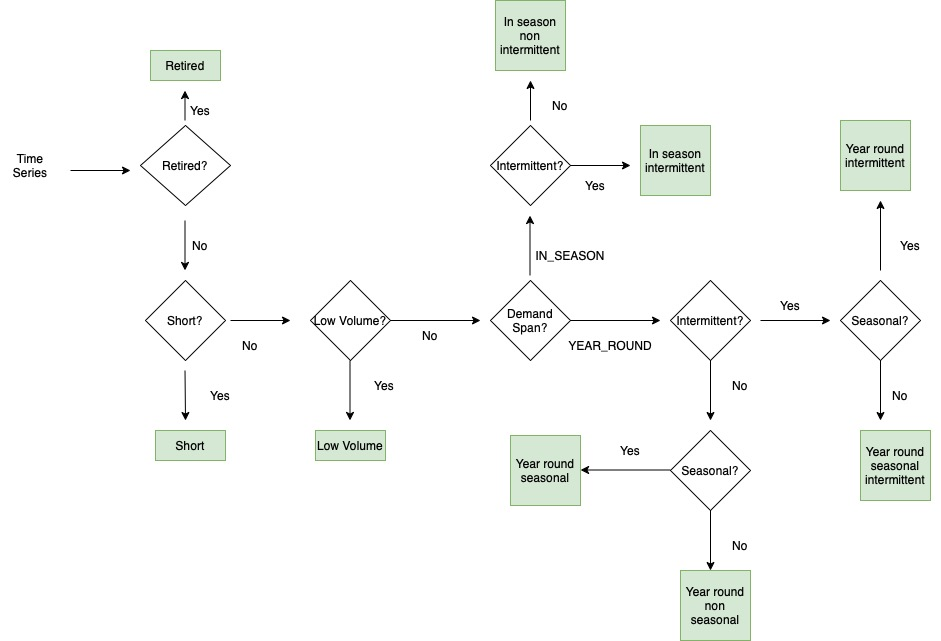

В первую очередь проверятеся, является ли временной ряд вырожденным. Прогнозирование вырожденного временного ряда является тривиальным, и дальнейшее исследование не требуется. Граница вырожденности определяется индивидуально для каждого временного ряда, в зависимости от его сезонности. 

Если временной ряд не вырожден, вторая проверка на то, короткий ли он. Короткие временные ряды не несут достаточно информации об их внутреннем устройстве, поэтому при данном подходе бессмысленно их пытаться классифицировать дальше. Длина, ниже которой, временной ряд считается коротким, определяется для каждого ряда индивидуально, в зависимости от его сезонности. 

Следующим шагом убираются из рассмотрения временные ряды с низким объемом продаж. Для рядов низкого объема, сегментация и определение сезонности не добавляют точности прогнозов. В данной работе рядами с низким объемом считаются наименьшие 10% рядов. Эта граница выбрана эмпирически и может быть изменена. 

Когда из рассмотрения убраны все, так или иначе, вырожденные или малозначимые ряды, определяется интервал спроса. Он может быть либо круглогодичным (YEAR ROUND) либо сезонным (INSEASON), определение этого периода является важным для дальнейшей классификации. 

После этого, ряды с сезонным периодом спроса проверяются только на непрерывность. 

Ряды с круглогодичным периодом спроса также проходят тест на непрерывность. Однако этого недостаточно для классификации. Чтобы проверить ряд на сезонную непрерывность, нужно аккумулировать ряд на один уровень выше. То есть, например, если рассматривается временной интервал "месяц", то ряд аккумулируется на уровень квартала, и к нему применяется проверка на сезонность. Если сезонность невозможно определить, ряд относится к круглогодичным другим (YEAR ROUND OTHER).

По совокупности этих тестов, определяется к какому классу относится временной ряд. 

В следующей главе рассмотрим алгоритмы построения прогноза для различных сегментов временных рядов. 


# Построение прогнозов для временных рядов


Существует множество подходов к прогнозированию временных рядов. Часто различные подходы к прогнозированию хорошо работают для разных входных данных. Например, модели из семейства ARIMA хорошо прогнозируют временные ряды с сезонными эффектами, а модели типа Croston хорошо прогнозируют случайные временные ряды. 

Поэтому для каждого сегмнета временных рядов, определенных в предыдущей главе, будет строиться модель, методика построения которой будет основываться на эмпирических свойствах временного ряда. 

Например, вырожденные временные ряды будут прогнозироваться константным нулевым значением. Временные ряды с выраженной сезонностью будут прогнозироваться моделями семейства ARIMA и моделями Экспоненциального сглаживания с учетом сезонных компонент. 



Рассмотрим предложенные модели прогнозирования для сегментов временных рядов, выделенных в предыдущем пункте. 

*   **RETIRED/Вырожденные временные ряды** Это вырожденный случай верменного ряда, который более не содержит периодов спроса. Он будет прогнозироваться постоянным нулем. 

*  **SHORT/Короткие временные ряды** К этому сегменту относятся временные ряды, количество наблюдений которых недостаточно для построения прогноза в зависимости от сезонности и непрерывности. Они будут прогнозироваться методом движущегося среднего с расширяющимся окном. 
*   **LOW_VOLUME/Временные ряды с низким объемом** К этому семейству относятся временные ряды, объем которых мал по сравнению с остальными временными рядами датасета. В связи с тем, что в этом сегменте потенциально низкие значения нет возможости точно определить параметры этих временных рядов. Прогноз будет строиться с помощью Простого экспоненциального сглаживания. 
*   **INSEASON_INTERMITTENT/Прерывистые сезонные временные ряды** Эти временные ряды характеризуются тем, что период спроса сезонный, но при этом в нем нет паттерна, который мы могли бы увидеть. Причиной этого могут быть экзогенные факторы (например, акции со скидками), о которых у нас нет данных в рамках данной задачи. Чтобы строить прогноз для таких временных рядов, будет использоваться модель Croston. Эта модель была предложена в 1972 для прогнозирования запасов при прерывистом спросе. Она заключается в том, что рассматриваются периоды спроса, оценивается их длительность и расстояние между ними, и основываясь на уровне спроса и вероятности появления участка спроса, строится прогноз. Вариант коррекции подбирается динамически.  

*   **INSEASON_NON_INTERMITTENT/Непрерывные сезонные временные ряды** В этом сегменте находятся те временные ряды, которые имеют сезонный период спроса, но при этом они непрерывны. Для их прогнозирования выбрано семейтсво ARIMA, параметры которого подбираются динамически. 

*   **YEAR_ROUND_INTERMITTENT/Случайные круглогодичные временные ряды** Временные ряды в этом сегменте не имеют выраженных периодов сезонной активности, период спроса весь год. Однако, как и в случае с INSEASON_INTERMITTENT временными рядами, мы не обладаем информацией о сезонности в этих временных рядах, поэтому прогнозируем их также с помощью модели Croston с подбором параметров.

*   **YEAR_ROUND_SEASONAL/Круглогодичные сезонные временные ряды** Временные ряды данного сегмента обладают круглогодичным периодом активности спроса, а так же сезонной составляющей. Для их прогнозирования будет использоваться Сезонное экспоненциальное сглаживание с динамическим подбором модели.

*   **YEAR_ROUND_NON_SEASONAL/Круглогодичные не временные ряды без сезонной компоненты** К этой группе относятся временные ряды с круглогодичным периодом активности спроса, но без сезонной компоненты. Прогноз для них будет строиться с помощью Экспоненциального сглаживания без сезонных компонент. Конкретные параметры модели подбираются индивидуально для каждого временного ряда. 

*   **YEAR_ROUND_SEASONAL_INTERMITTENT/Круглогодичные сезонные случайные временные ряды** К этому сегменту относятся временные ряды с круглогодичным периодом активности спроса, с выраженным сезонным паттерном, и случайными. Прогноз для них будет строиться с помощью сезонных моделей экспоненциального сглаживания. 

*   **YEAR_ROUND_OTHER/Остальные временные ряды с круглогодичным периодом активности** К этой группе относятся временные ряды с длиннымпериодом спроса, но при этом без опознаваемых паттернов. Эти временные ряды будут прогнозироваться с помощью Движущегося среднего с расширяющимся окном наблюдений. 

# Результаты экспериментов

В этой главе будут рассмотрены результаты проведенной сегментации, а также проведены сравнения с базовыми алгоритмами. 

## Результаты подхода основанного на сегментации

Рассмотрим результаты проведенной классификации. После итогам проведения сегментации, оказалось, что датасет состоит из:


|                         |                |
|-------------------------|----------------|
|INSEASON_NON_INTERMITTENT|           13455|
|INSEASON_INTERMITTENT    |         12488|
|LOW_VOLUME                           |2887|
|RETIRED                               |912|
|YEAR_ROUND_SEASONAL                   |1303|
|YEAR_ROUND_SEASONAL_INTERMITTENT      |2215|
|YEAR_ROUND_NOT_SEASONAL               |2192|
|YEAR_ROUND_INTERMITTENT                |1437|



Рассмотрим графики нескольких временных рядов, относящихся к разным классам. Это поможет получить лучшее представление о том, как устроены временные ряды. 

### INSEASON_INTERMITTENT/Не непрерывные сезонные временные ряды

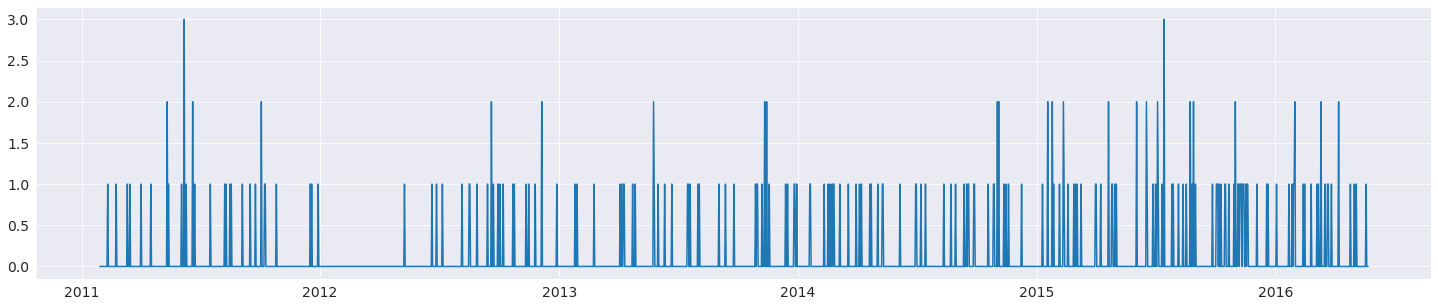

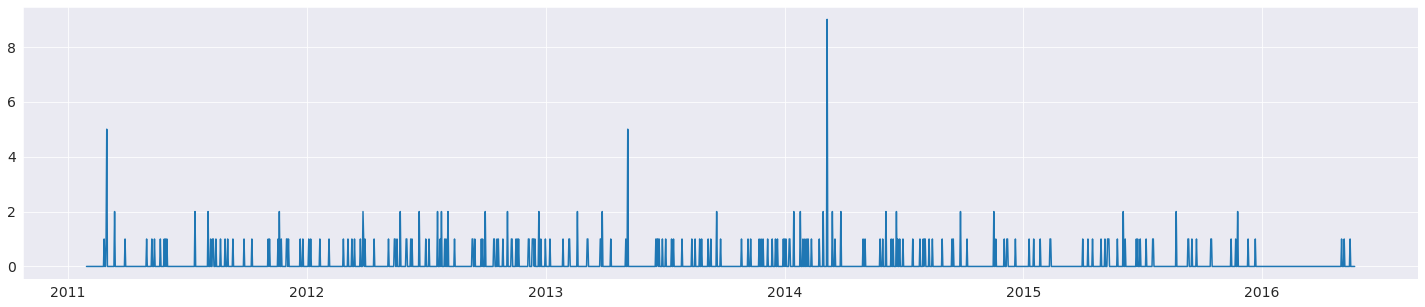

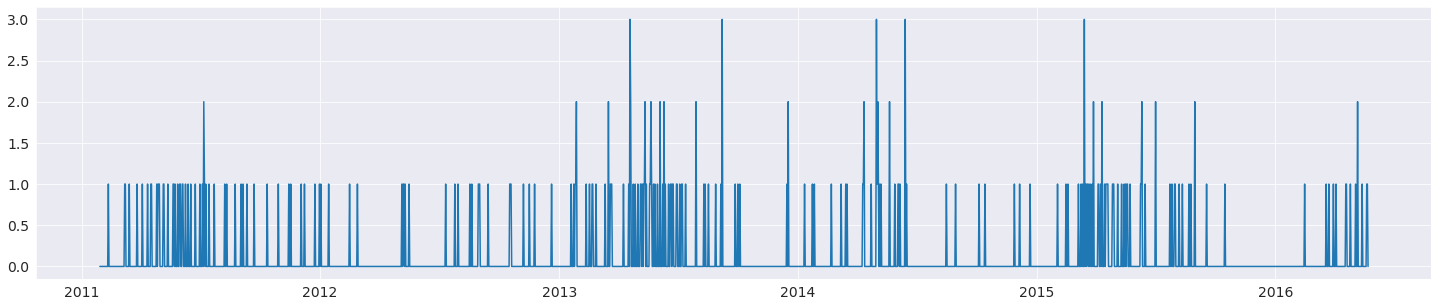

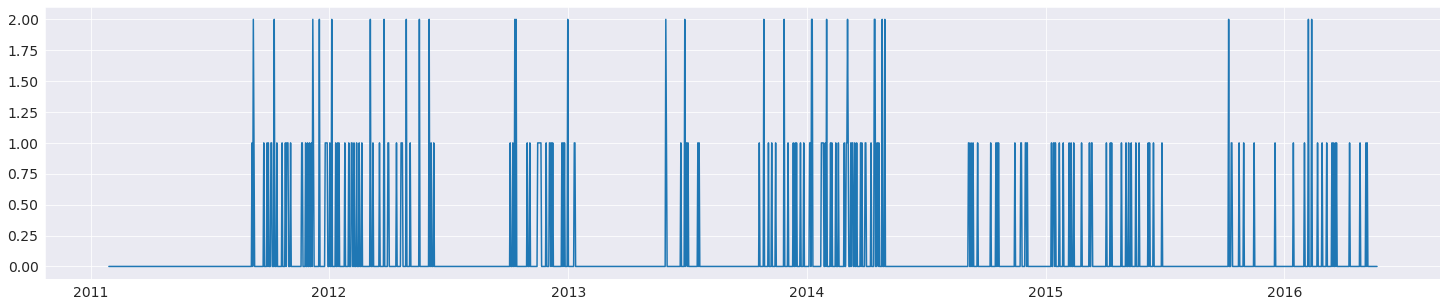

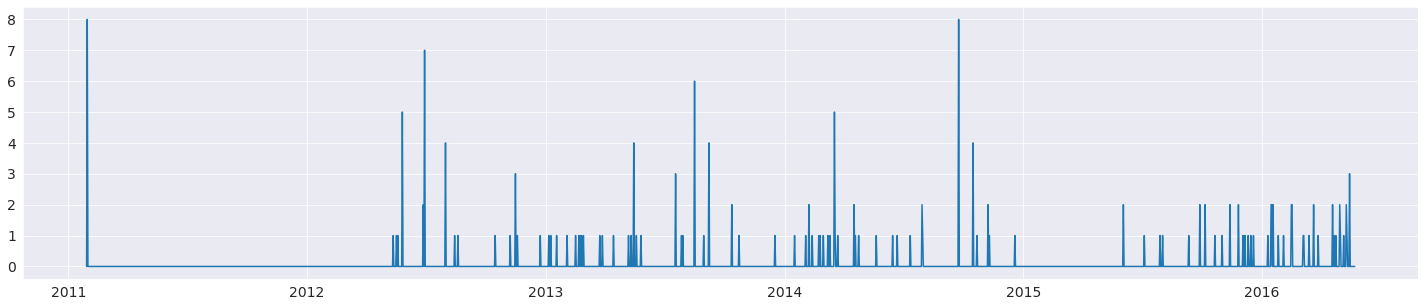

В этих временных рядах есть длинные промежутки отсутствия спроса, но в отрезках, где спрос есть, много коротких промежутков отсутствия спроса.

### INSEASON_NON_INTERMITTENT/Непрерывные сезонные временные ряды

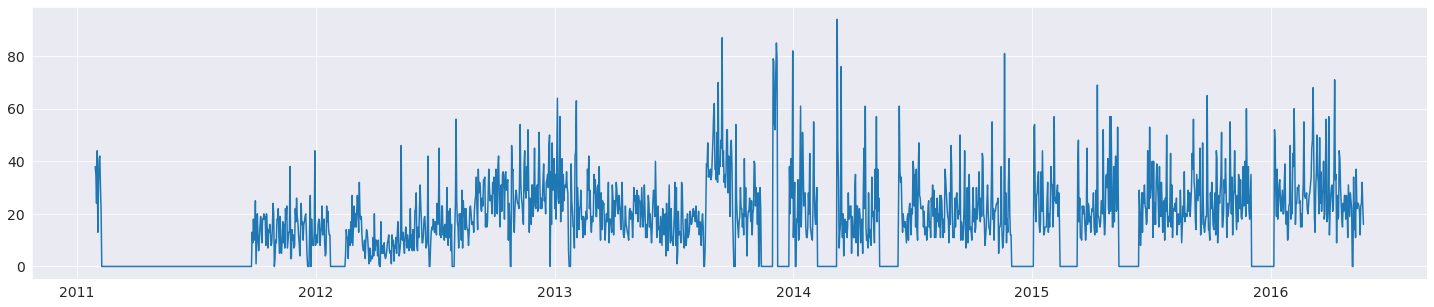

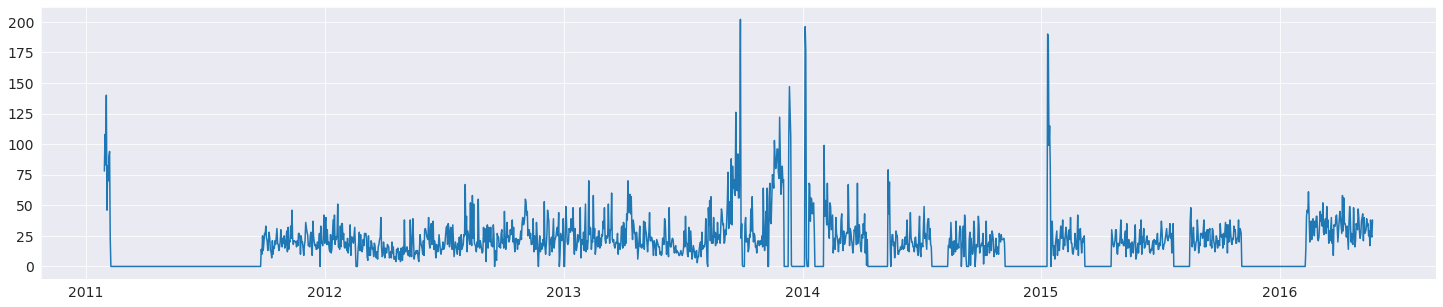

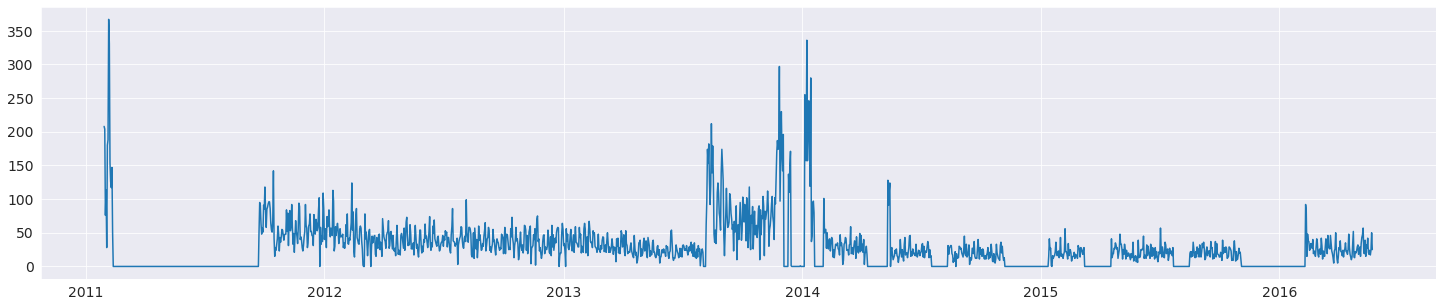

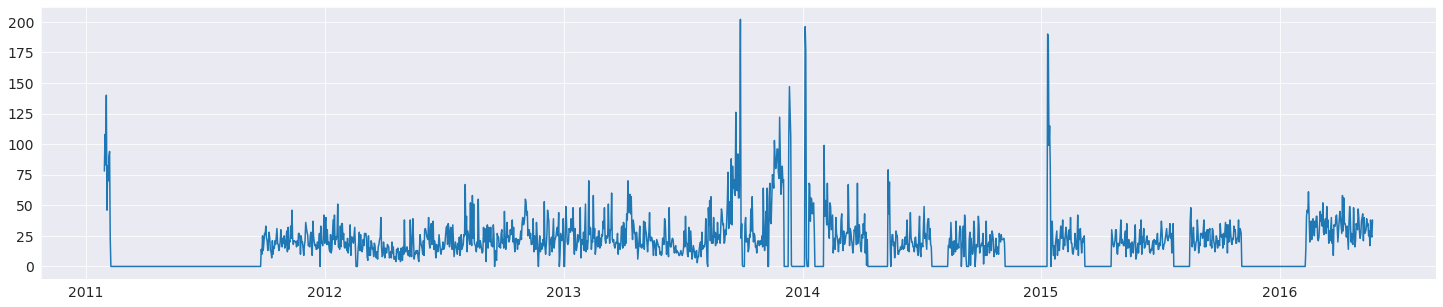

Посмотрев на графики, можно сказать, что спрос на товар не круглогодичный, но внутри приоды спроса непрерывны. 

### YEAR_ROUND_SEASONAL_INTERMITTENT/Круглогодичные сезонные прерывистые временные ряды

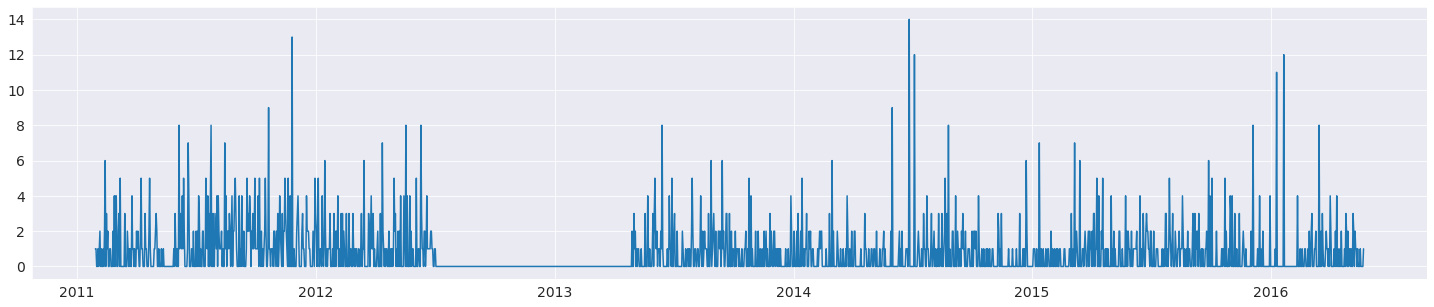

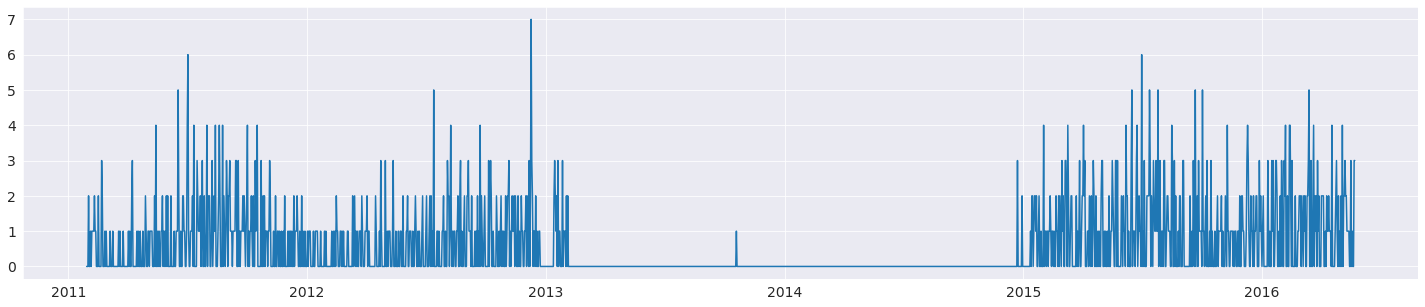

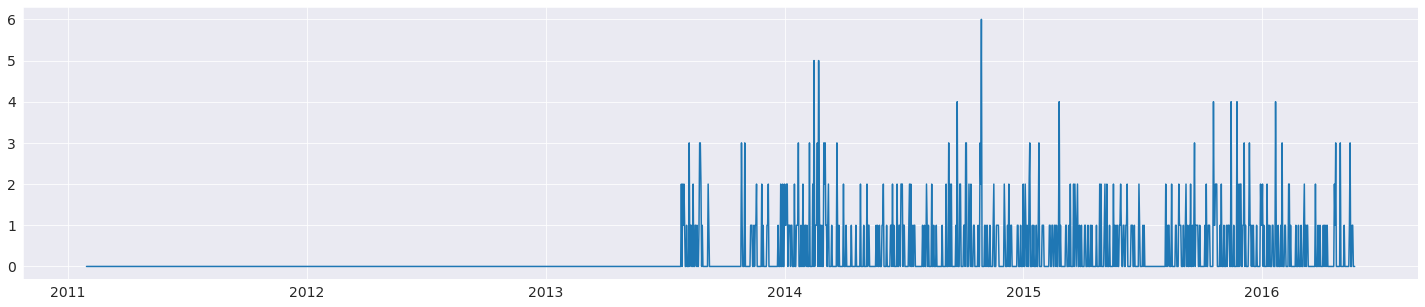

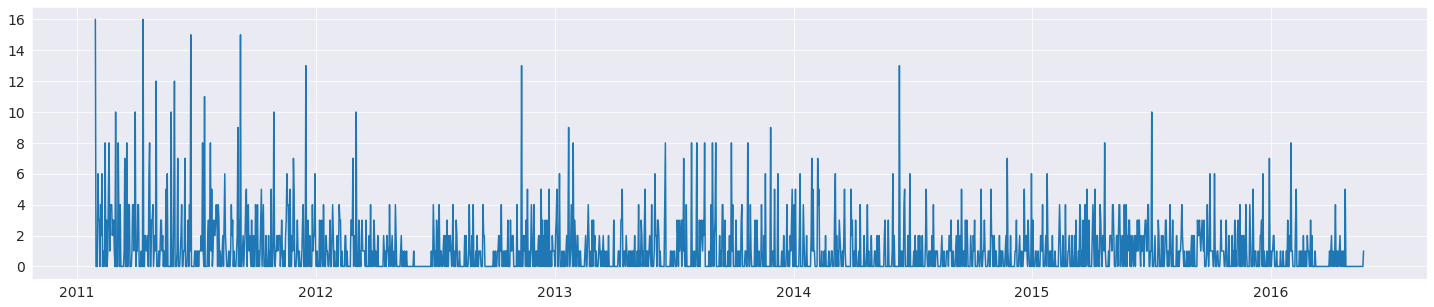

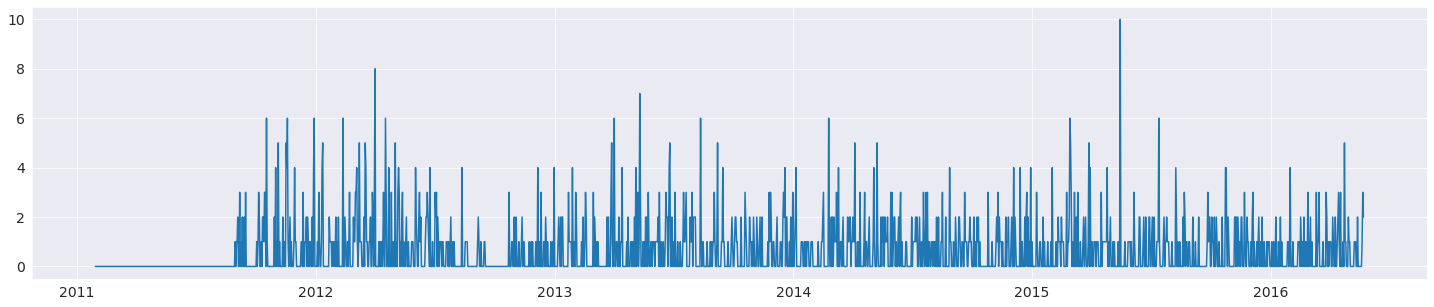

Эти временные ряды имеют меньше продолжительных периодов отсутствия спроса, но есть много коротких промежутков отсутсвия и наличия спроса. 

### YEAR_ROUND_INTERMITTENT/Прерывистые круглогодичные временные ряды

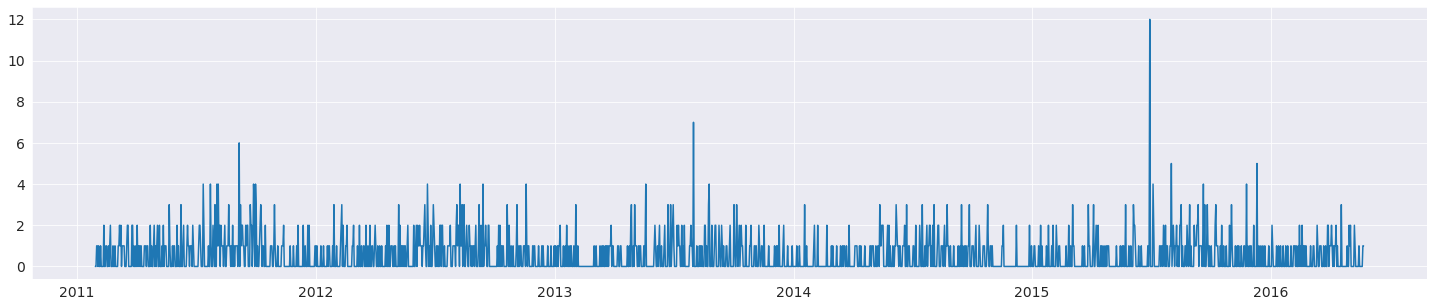

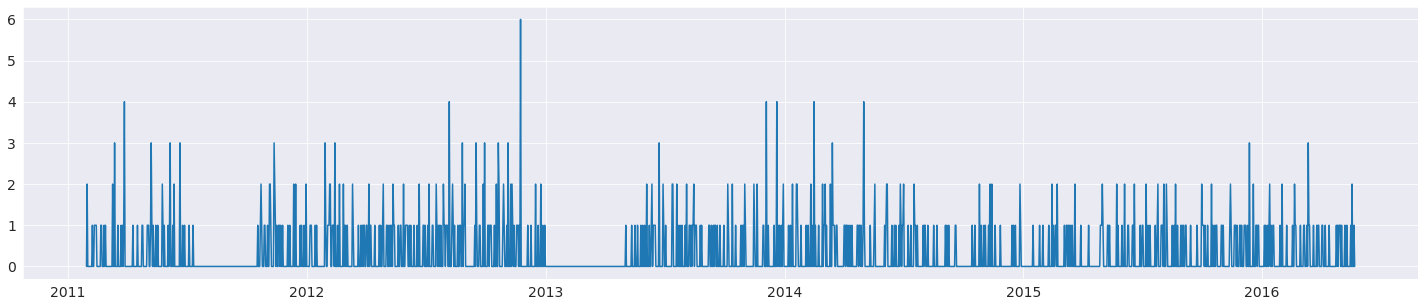

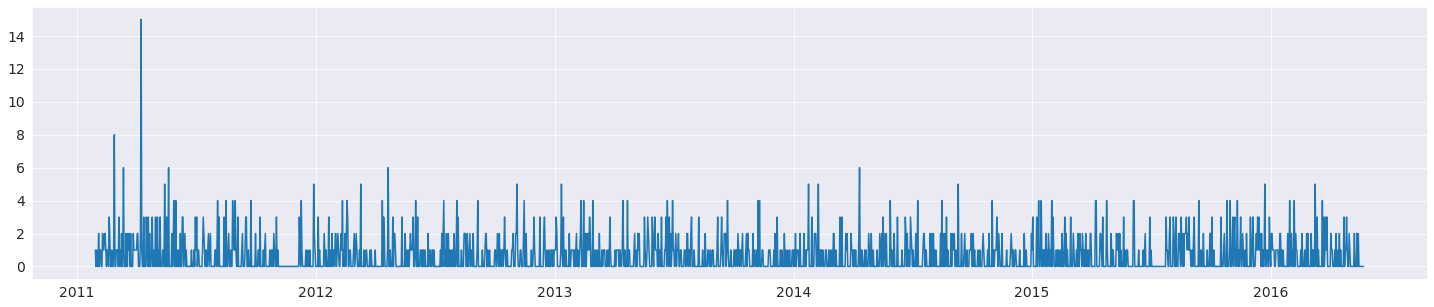

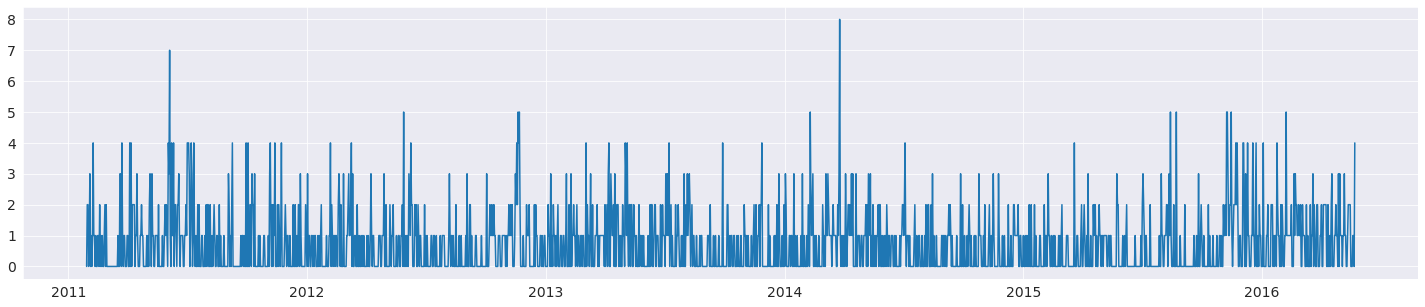

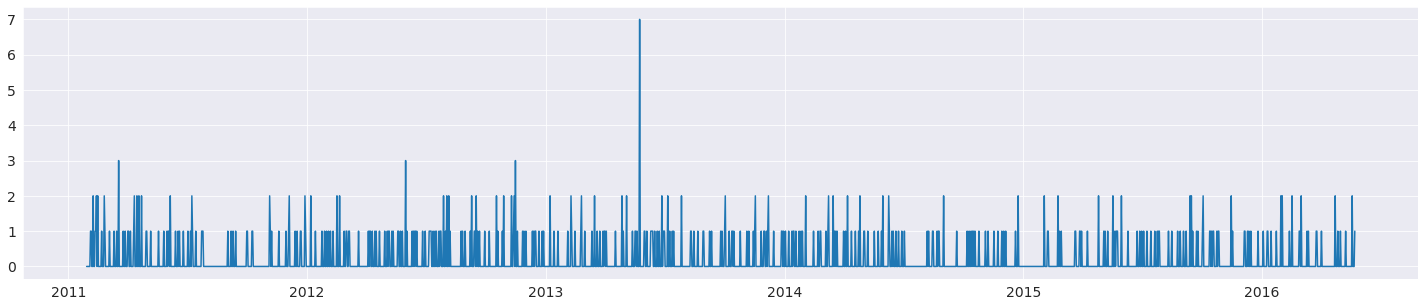

Аналогично предыдущему сегменту, эти временные ряды имеют годовой перио активности, но в отличие от предыдущей группы, не обладают выраженной сезонной компонентой. 

### RETIRED/Вырожденные временные ряды 

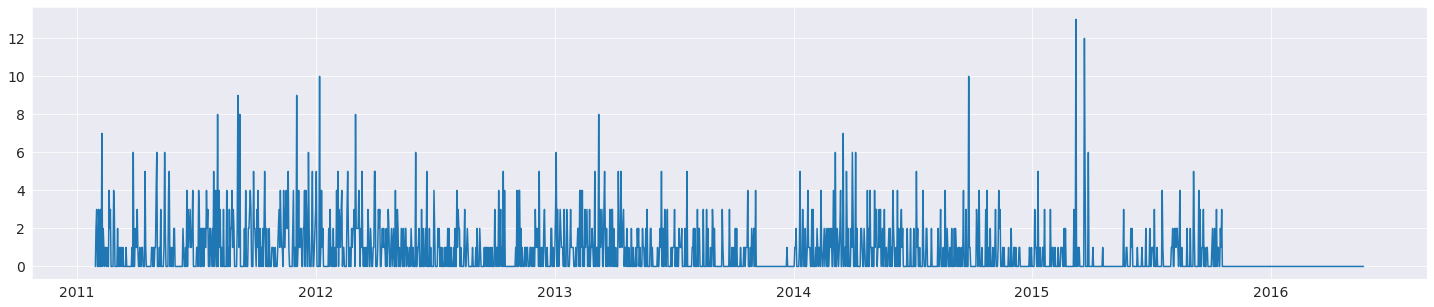

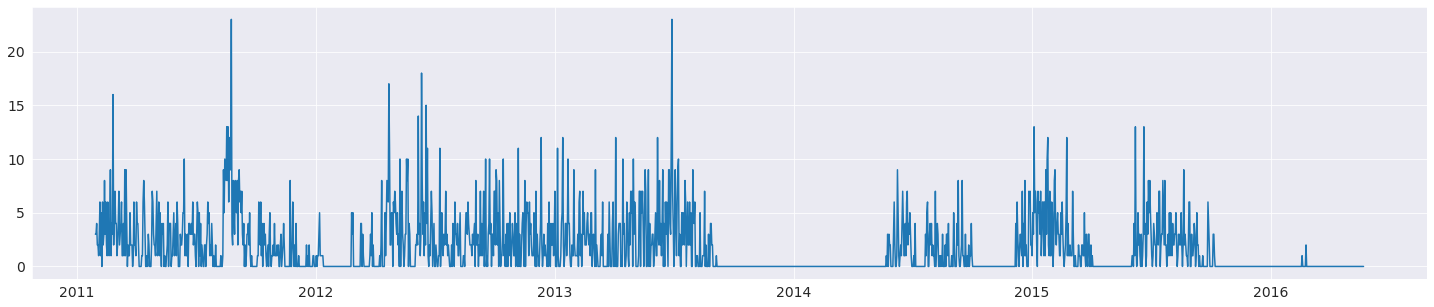

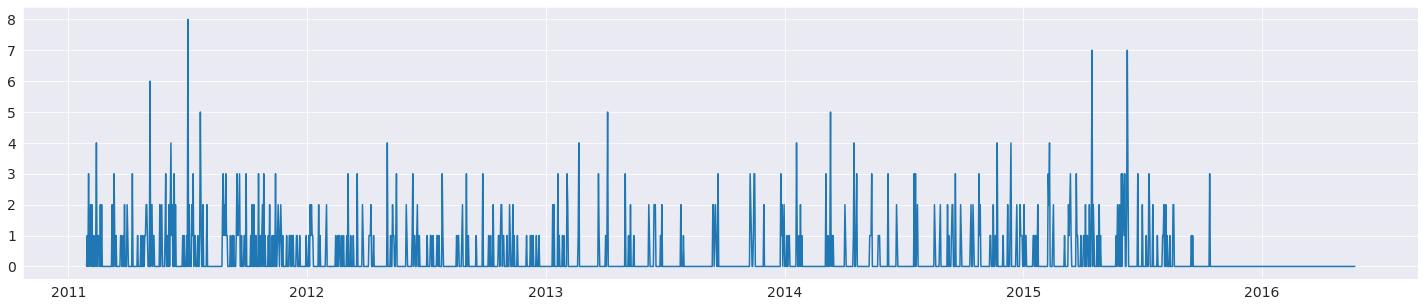

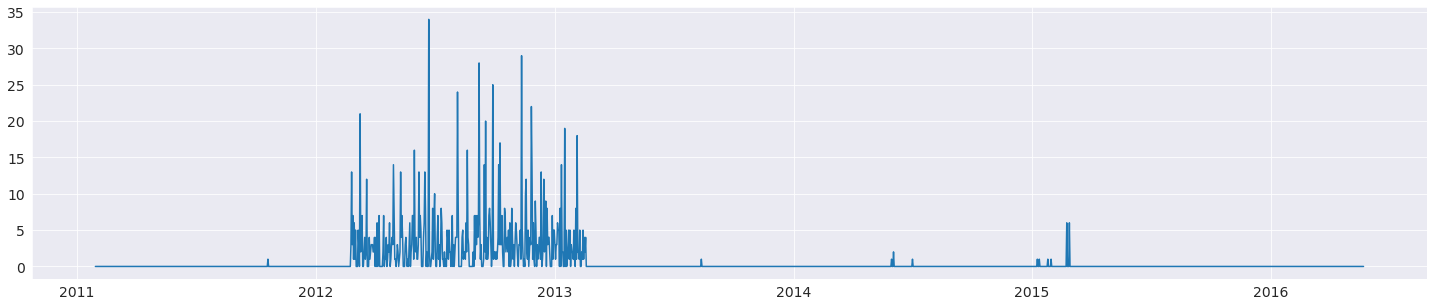

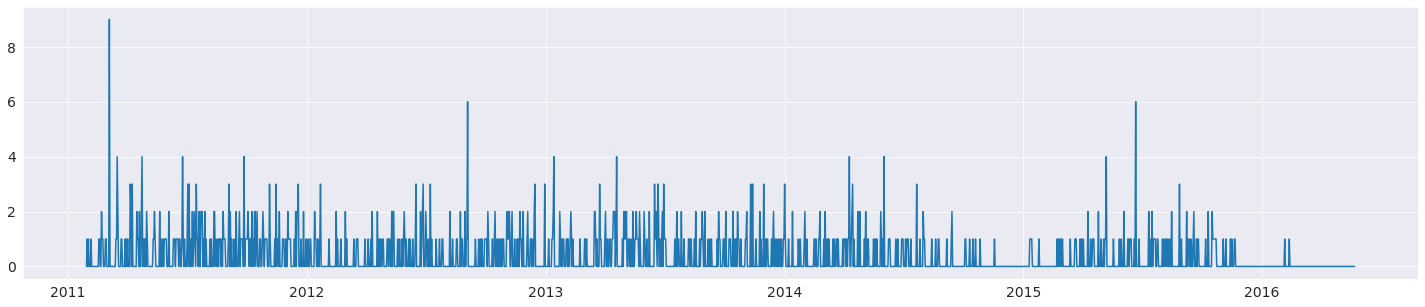

К этой группе относятся временные ряды, которые долгое время не были активными. Порог неактивности, после которого ряд считается вырожденным, определяется динамически для каждого ряда, основываясь на его свойствах, например, сезонности. 

### LOW_VOLUME/Временные ряды с низким объемом 

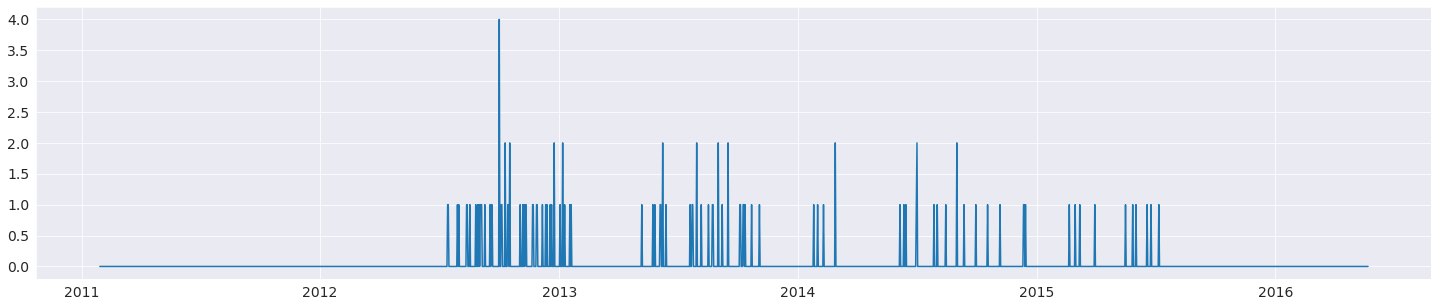

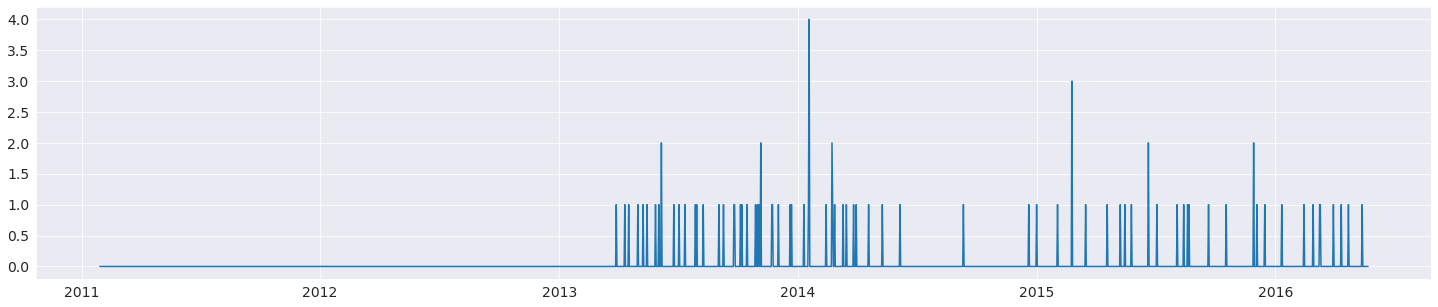

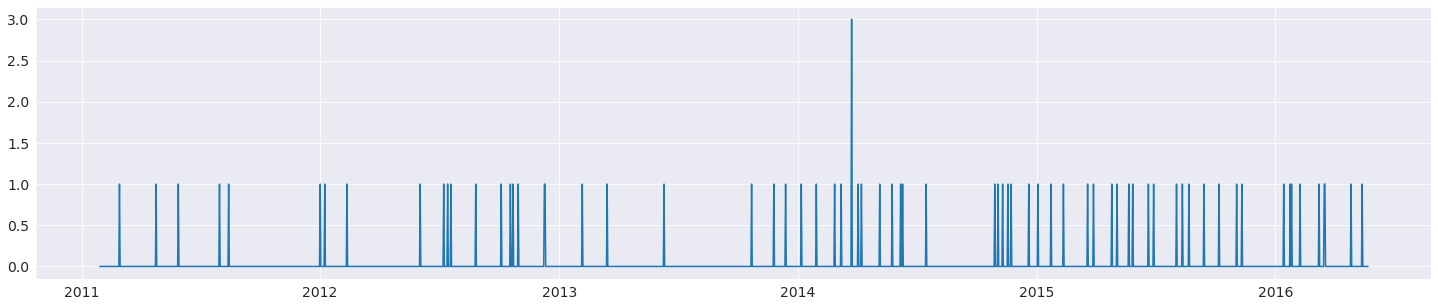

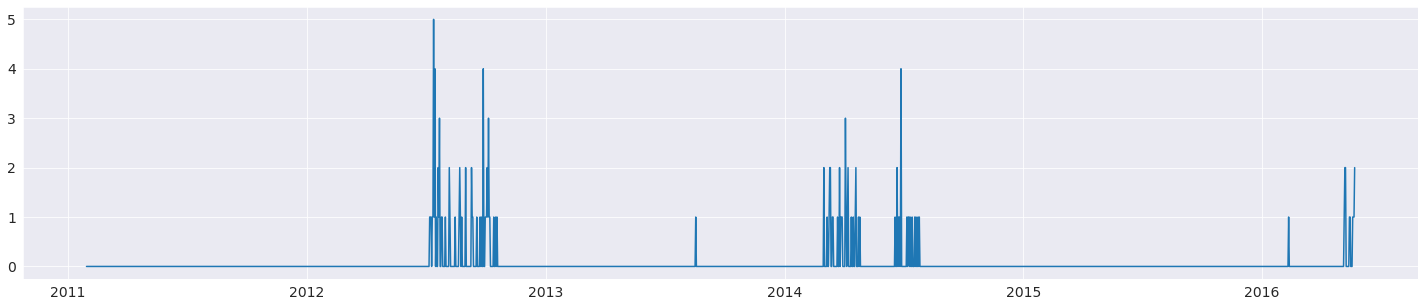

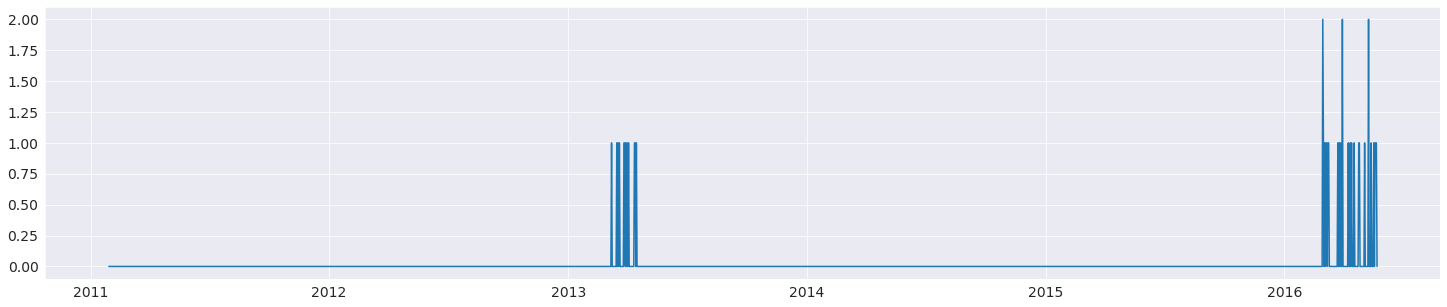

В этом сегменте находятся временные ряды с небольшим объемом продаж. Это могут быть товары, которые непопулярны про какой-то причине, или новые товары, только поступившие на рынок. Но в датасете недостаточно информации, чтобы делать выводы об их свойствах. 
В эту группу могут попасть временные ряды, описывающие товары, которые только начали продаваться. Но прогнозирование их с помощью движущегося среднего может предложить достаточно хорошее качество до тех пор, пока не наберется больше данных, после чего временной ряд можно будет реклассифицировать. 

### YEAR_ROUND_NON_SEASONAL/Круглогодичные не временные ряды без сезонной компоненты 

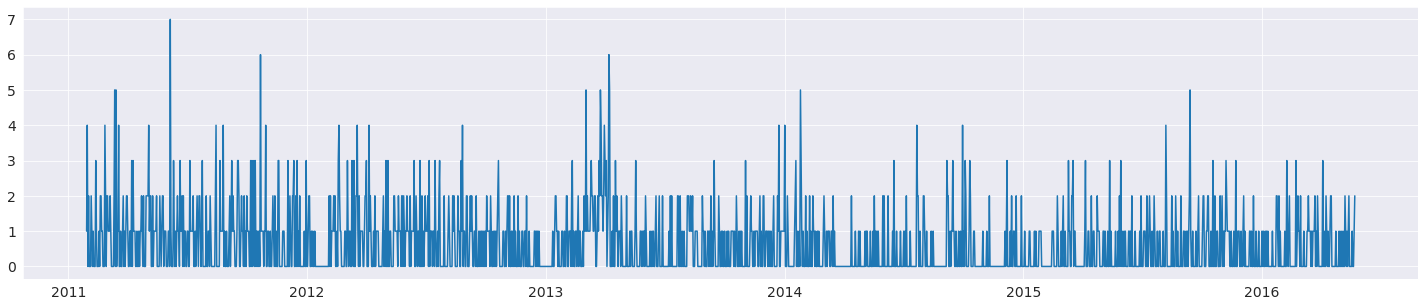

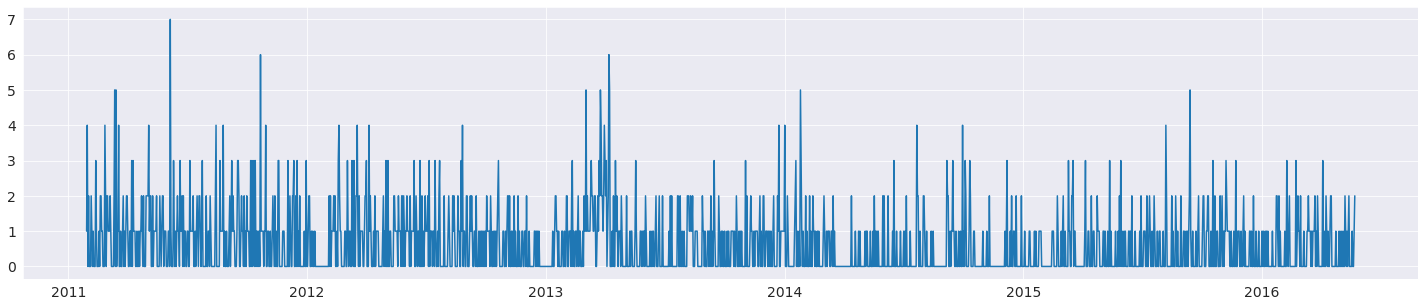

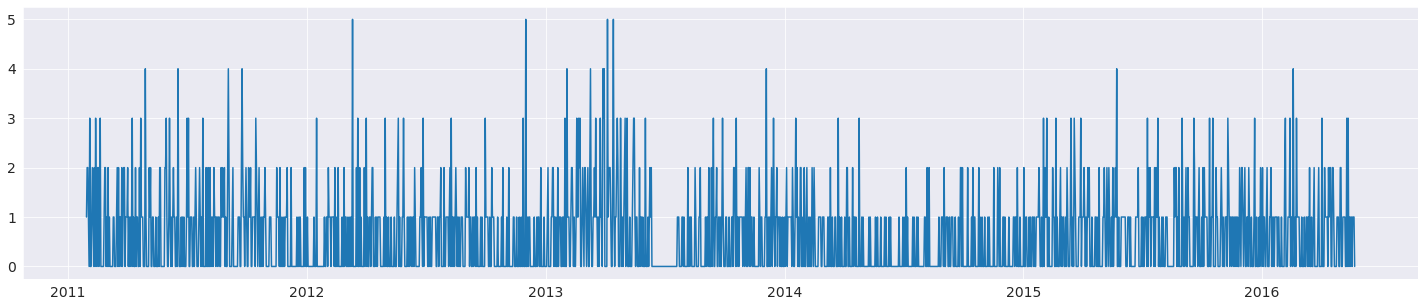

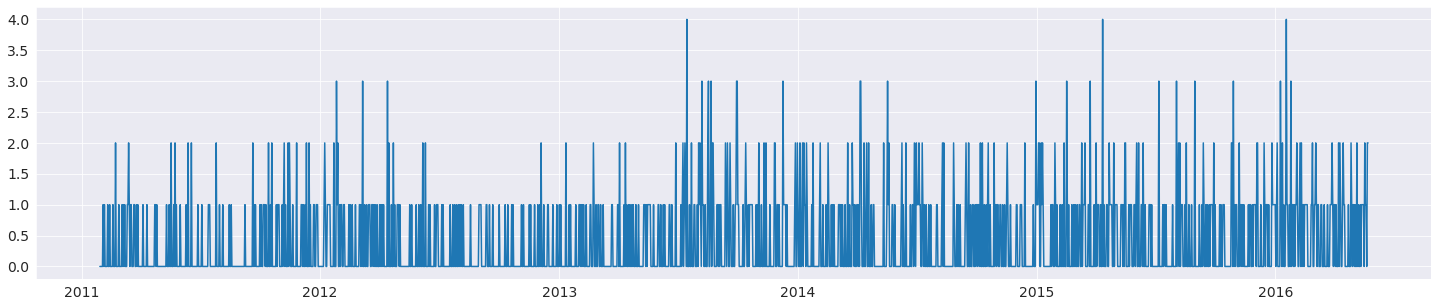

В этом сегменте находятся врменные ряды с периодом активности год, без сильной сезонности. От YEAR_ROUND_INTERMITTENT они отличаются тем, что не являются случайными. В нашем случае это значит, что у них нет большого количества коротких периодов неактивности. 

### YEAR_ROUND_SEASONAL/Круглогодичные сезонные временные ряды 

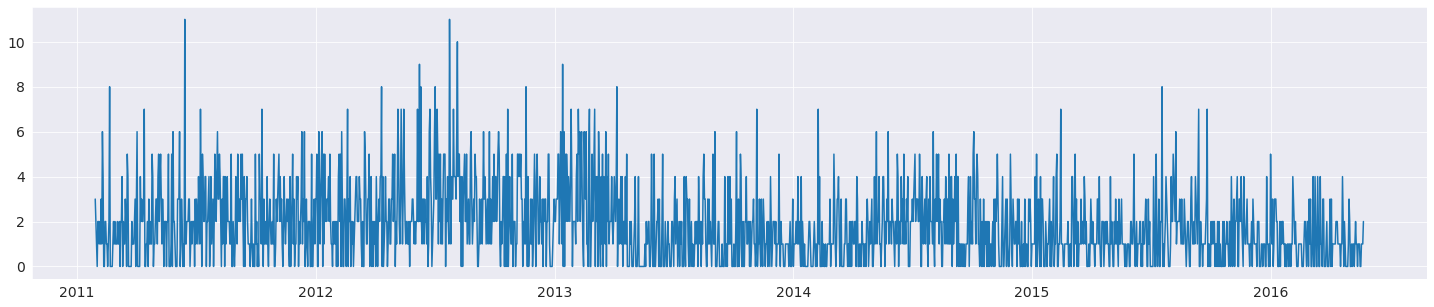

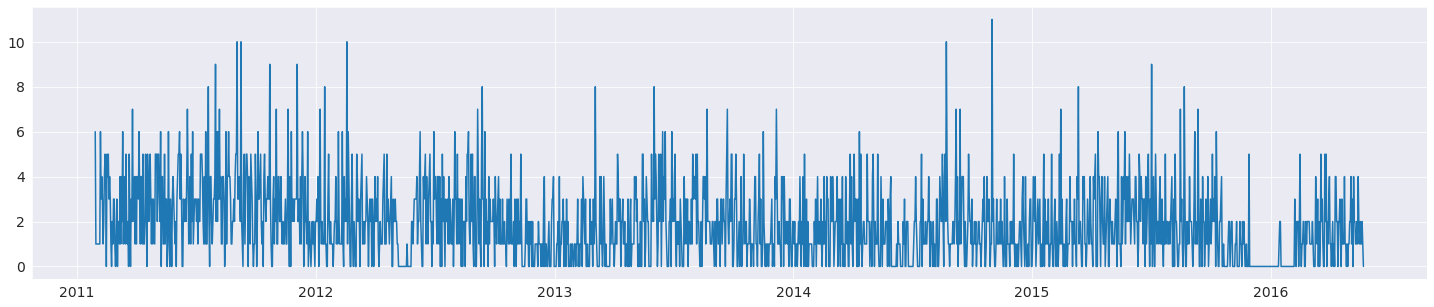

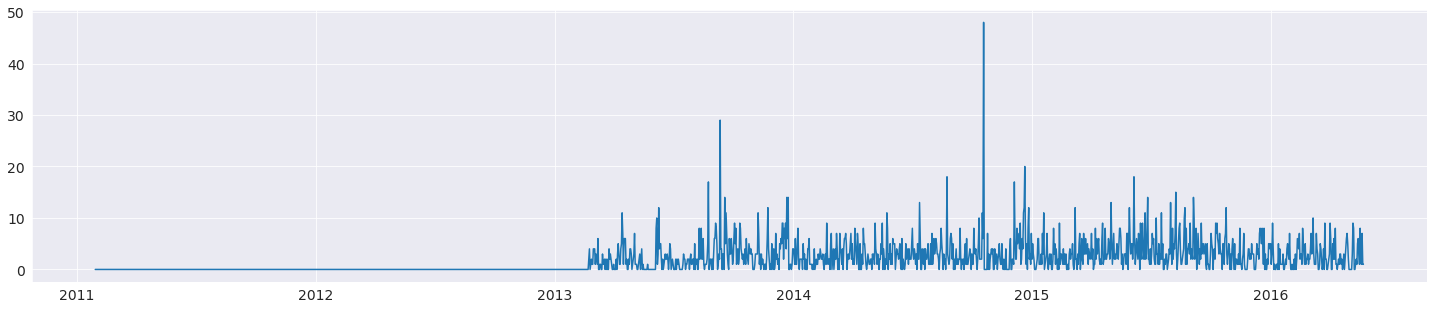

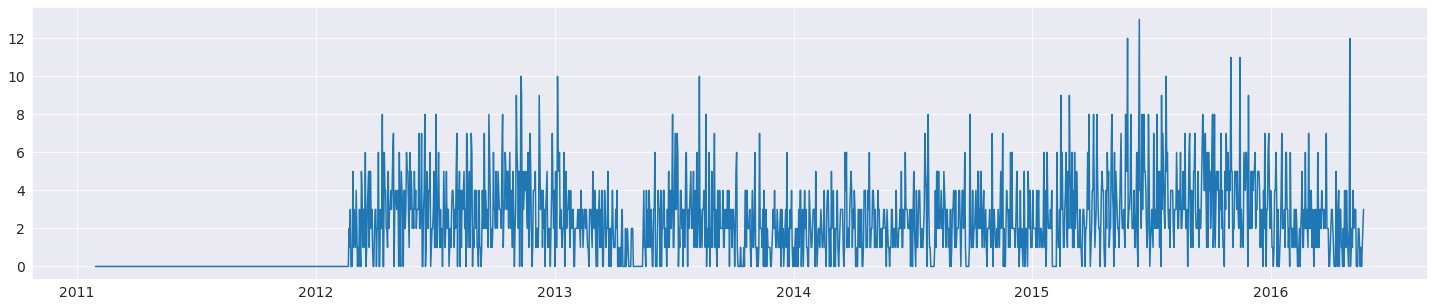

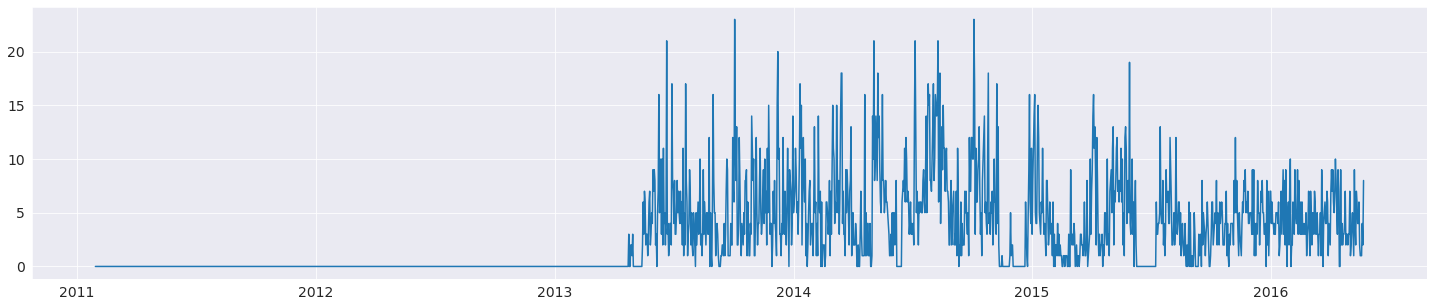

В этой группе находятся временные ряды с круглогодичным периодом спроса, не случайные и с выраженной сезонной компонентой. 

## Сравнение с baseline

В качестве baseline подходов были рассмотрены Prophet и Простое экспоненциальное сглаживание. 

Всеми тремя методами был построен прогноз для временных рядов на 28 дней и вычислены ошибки. 
В качестве функции для вычисления ошибок была использована MAE. Далее были рассмотрены разности ошибок по сравнению с baseline (то есть разница pipeline - prophet, pipeline - simeple exponential smoothing). 

Ниже будут представлены разности ошибок по сравнению с алгоритмами baseline, как в целом, так и по каждому классу отдельно.

| Класс  | Prophet  | SES  |
|--------|----------|------|
|Общее значение   | -36.09  |-5.7   |
|RETIRED   | -9.06  | -0.32  |   |
|INSEASON_INTERMITTENT   |-0.22   |0.05   |   |
|INSEASON_NON_INTERMITTENT   |-24.59   |-4.53   |   |
|YEAR_ROUND_NOT_SEASONAL   |-0.11   |-0.15   |   |
|LOW_VOLUME   |-0.05   |0.00   |   |
|YEAR_ROUND_INTERMITTENT   |-0.09   |-0.01   |   |
|YEAR_ROUND_SEASONAL_INTERMITTENT   |-0.42   |-0.1   | 
|YEAR_ROUND_SEASONAL   |-1.55   |-0.8   | 


Таким образом, мы видим, что подход прогнозирования временных рядов, основанный на сегментировании, показывает себя не хуже, чем базовые алгоритмы.

Улучшить качество можно было бы рассматривая более широкий класс моделей, например, для временных рядов из сегмента YEAR_ROUND_SEASONAL_INTERMITTENT рассматривать не только модели экспоненциального сглаживания, но и ARIMA.




# Выводы

В данной работе был предложен алгоритм сегментации временных рядов, основывающийся на анализе параметров временного ряда, таких как сезонность, случайность, периоды спроса.

Также в работе был предложен способ прогнозирования временных рядов в зависимости от сегмента, к которому они относится. Прогнозирование проводилось с помощью классических алгоритмов, таких как ARIMA, Экспоненциальное сглаживание и Croston. 

На примере датасета M5-Forecasting был проведен анализ получившейся сегментации и построенных прогнозов. Прогнозы, построенные с помощью алгоритма сегментации временных рядов показали меньшие значения MAE на данном датасете. Это оказалось верно как в целом, так и по сегментам. 

В качестве улучшения данного механизма прогнозирования, можно добавить экзогенные переменные. Они смогут улучшить сегментацию временных рядов в части определения сезонности. Также, экзогенные переменные могут улучшить прогнозирование не случайных временных рядов. 